<a href="https://colab.research.google.com/github/umarpir/HousePricePredictor/blob/main/House_price_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from google.colab import files
upload = files.upload()

Saving hpe-jan-22.csv to hpe-jan-22.csv


importing the uk house price data set

In [19]:
house_price_dataset = pd.read_csv('hpe-jan-22.csv')

In [20]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [21]:
house_price_dataframe.head()

,Price Paid,Post code,House Type,New Build,Estate Type,Town/City,District,County
0,105300,B34 7NS,F,Y,L,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS
1,145000,CR0 5UB,F,N,L,CROYDON,CROYDON,GREATER LONDON
2,277000,W14 8SJ,F,N,L,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON
3,465000,EX5 3AF,D,N,F,EXETER,EAST DEVON,DEVON
4,687500,BH21 1RY,D,N,F,WIMBORNE,"BOURNEMOUTH, CHRISTCHURCH AND POOLE","BOURNEMOUTH, CHRISTCHURCH AND POOLE"


In [22]:
# check the sumber of rows and columns
house_price_dataframe.shape

(132332, 8)

In [23]:
# check for missing values
house_price_dataframe.isnull().sum() 

Price Paid       0
Post code      396
House Type       0
New Build        0
Estate Type      0
Town/City        0
District         0
County           0
dtype: int64

In [29]:
#drop columns that have any missing values
house_price_dataframe = house_price_dataframe.dropna(how='any')

In [31]:
# check again for missing values
house_price_dataframe.isnull().sum()

Price Paid     0
Post code      0
House Type     0
New Build      0
Estate Type    0
Town/City      0
District       0
County         0
dtype: int64

In [33]:
# check the number of rows and columns again
house_price_dataframe.shape

(131936, 8)

In [36]:
house_price_dataframe.describe(include = 'all')

,Price Paid,Post code,House Type,New Build,Estate Type,Town/City,District,County
count,1.319360e+05,131936,131936,131936,131936,131936,131936,131936
unique,NaN,111904,5,2,2,1130,338,113
top,NaN,E14 9GU,T,N,F,LONDON,BIRMINGHAM,GREATER LONDON
freq,NaN,225,36340,122413,100730,9852,1706,16092
mean,3.854180e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.213649e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.720000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.699975e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.150000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


understanding the correlation in the data

In [40]:
correlation = house_price_dataframe.corr()

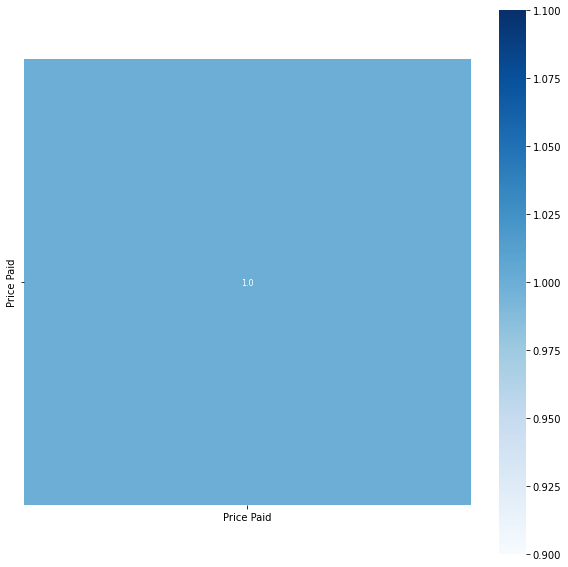

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt = '.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [50]:
X = house_price_dataframe.drop(['Price Paid'], axis=1)
Y = house_price_dataframe['Price Paid']

In [51]:
print(X)
print(Y)

       Post code  ...                               County
0        B34 7NS  ...                        WEST MIDLANDS
1        CR0 5UB  ...                       GREATER LONDON
2        W14 8SJ  ...                       GREATER LONDON
3        EX5 3AF  ...                                DEVON
4       BH21 1RY  ...  BOURNEMOUTH, CHRISTCHURCH AND POOLE
...          ...  ...                                  ...
132327   E14 2DN  ...                       GREATER LONDON
132328   IG1 4RX  ...                       GREATER LONDON
132329  NW10 8TN  ...                       GREATER LONDON
132330   UB8 3DS  ...                       GREATER LONDON
132331   SW6 5HQ  ...                       GREATER LONDON

[131936 rows x 7 columns]
0         105300
1         145000
2         277000
3         465000
4         687500
           ...  
132327    490000
132328    500000
132329    340000
132330    510000
132331    425000
Name: Price Paid, Length: 131936, dtype: int64
